In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from math import ceil
import random

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def train_test_split(x,y,ratio=0.8):
  random_list = np.random.permutation(x.shape[0])
  x = x[random_list,:]
  y = y[random_list]
  trainratio = int(x.shape[0]*ratio)

  x_train = x[:trainratio,:] 
  y_train = y[:trainratio]

  x_test = x[trainratio:,:]
  y_test = y[trainratio:]

  return x_train,y_train,x_test,y_test

In [4]:
def normalization(X):
      mean = np.mean(X, axis=0, keepdims=1)
      std = np.std(X, axis=0, keepdims=1)
      X = (X - mean) / std
      return X

In [5]:
def one_hot_encode(Y):
    classes = 3
    one_hot = np.zeros((Y.shape[0],classes))
    for i in range(Y.shape[0]):
        one_hot[i,Y[i]] = 1
    return one_hot

الف


In [6]:
X, Y = load_iris(return_X_y=True)
X = normalization(X)
Y = one_hot_encode(Y)

In [7]:
x_train, y_train , x_test, y_test = train_test_split(X,Y)

In [8]:
x_train = x_train.T
x_test = x_test.T

In [9]:
def plot_1D(cost,title=None):
   x = [i for i in range(len(cost))]
   plt.figure(figsize =(9, 6))
   plt.plot(x,cost, label ='Cost function',c='red')
   plt.xlabel('Ittertion')
   plt.ylabel('Cost')
   plt.title(title)
   plt.legend()
   plt.show()

In [10]:
def plot_2D(y1,y2,x_lables=None,title=''):
   figure, axis = plt.subplots(2, figsize=(16,9))
   
   x1 = [i for i in range(len(y1))]
   x2 = [i for i in range(len(y2))]
   axis[0].plot(x1, y1,c='red')
   axis[0].set_title("Cost Function" + ' ' + title)
   axis[0].set_xlabel('Itteration')
   
   plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)
   
   axis[1].plot(x2, y2,c='green')
   axis[1].set_title("Accuracy Function" + ' ' + title)
   axis[1].set_xlabel('Itteration')

   plt.legend()
   plt.show()

In [11]:
def allocating_hyperparameters(layers,samples,random=True,seed=1):

    np.random.seed(seed)
    W = [None]
    Bias = [None]
    Z = [None]
    A = [None]

    for index in range(1,len(layers)):
        if random == True:
            W.append(np.random.randn(layers[index],layers[index-1]))
            Bias.append(np.random.randn(layers[index],1))
        else:
            W.append(np.zeros((layers[index],layers[index-1])))
            Bias.append(np.zeros((layers[index],1)))
            
        Z.append(np.zeros((layers[index],samples)))
        A.append(np.zeros((layers[index],samples)))
    return W, Bias, Z, A

In [12]:
def softmax_function(X):
    X = np.exp(X)
    sum = np.sum(X, axis=0)
    X = X / sum
    return X

In [13]:
def Relu(X):
    return max(0.0 , X)

In [14]:
def cost_estimation(hypothesis, Y):
    Y_hat = hypothesis * Y
    non_zero = np.nonzero(Y_hat)
    Y_hat = Y_hat[non_zero]
    Cost = -np.mean(np.log(Y_hat))
    return Cost

در تمامی شبکه ها تعداد نورون های شبکه عصبی در آرایه Layer داده شده است

ب

نمودار خطا در قسمت SGD بر حسب تعداد ایپاک رسم شده است.

In [15]:
class SGD_Neural_Networks:
    def __init__(self,layers=[4,6,3], learning_rate = 0.05, epoch=300):
        self.layers = layers
        self.samples = 1
        self.learning_rate = learning_rate
        self.cost = []
        self.accuracy = []
        #Forward propagation initialization
        self.W, self.Bias,self.Z,self.A = \
            allocating_hyperparameters(self.layers,1,random=True)

        #Backward propagation initialization
        self.dW, self.dBias,self.dZ,self.dA = \
            allocating_hyperparameters(self.layers,1,random=False)
       

    def Forward_Propagation(self,X):
        self.A[0] = X
        for index in range(1,len(self.layers)):
            self.Z[index] = np.dot(self.W[index], self.A[index-1]) + self.Bias[index]

            if index == len(self.layers) - 1:
                self.A[index] = softmax_function(self.Z[index])

            else:
                self.A[index] = sigmoid(self.Z[index])
        return self.Z, self.A
    
    def Backward_Propagation(self,Y):


        for layer in range(len(self.layers)-1, 0, -1):
            if layer == len(self.layers)-1:
                self.dZ[layer] = self.A[layer] - Y.T

            else : 
                self.dZ[layer] = np.dot((self.W[layer+1]).T,self.dZ[layer+1]) * (sigmoid(self.Z[layer]) * (1-sigmoid(self.Z[layer])))
            
            self.dW[layer] = np.dot(self.dZ[layer], (self.A[layer-1]).T)
            self.dBias[layer] = self.dZ[layer]

            self.dW[layer] = self.dW[layer] / self.samples
            self.dBias[layer] = self.dBias[layer] / self.samples

            self.W[layer] = self.W[layer] - (self.learning_rate * self.dW[layer])
            self.Bias[layer] = self.Bias[layer] - (self.learning_rate * self.dBias[layer])

    def Accuracy(self, y_hat, Y):

        y_hat = np.reshape(y_hat,3,1)
        y_hat = np.argmax(y_hat,axis=0)
        y_hat = np.reshape(y_hat, (1))

        y_hat = one_hot_encode(y_hat)
        
        if y_hat.shape != Y.shape:
            return None
        return np.sum(y_hat * Y) / Y.shape[0]

    def train_SGD(self, X, Y, lr=1e-5, Epoch=800):
            
        for epoch in range(Epoch):
            random_data = np.random.choice(x_train.shape[1])
            x_stochastic = x_train[:, random_data].reshape(4,1)
            y_stochastic = y_train[random_data,:].reshape(1,3)
            self.Forward_Propagation(x_stochastic)

            self.Backward_Propagation(y_stochastic)
            tmpCost = cost_estimation(self.A[-1], (y_stochastic).T)
            self.cost.append(tmpCost)
                       
        return self.A[-1],self.cost


ساختار شبکه شامل لایه ورودی، لایه خروجی و یک لایه مخفی با 4 نورون است

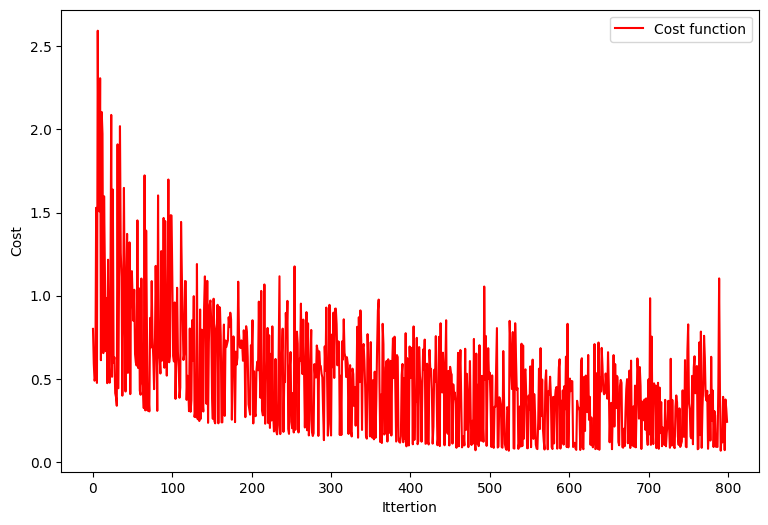

In [16]:
Neural_Network = SGD_Neural_Networks(layers=[x_train.shape[0],4,3],learning_rate=0.05)
A, cost = Neural_Network.train_SGD(x_train, y_train)
plot_1D(cost)

قسمت ج

نمودار خطا در قسمت mini batch بر حسب تعداد ایپاک رسم شده است.

In [17]:
class mini_batch_GD_Neural_Networks:
    def __init__(self,batch_size = 30,layers=[4,6,3], learning_rate = 0.05, epoch=300):
        self.layers = layers
        self.batch_size = batch_size
        self.samples = batch_size
        self.learning_rate = learning_rate
        self.cost = []
        self.accuracy = []
        #Forward propagation
        self.W, self.Bias,self.Z,self.A = \
            allocating_hyperparameters(self.layers,1,random=True)

        #Backward propagation
        self.dW, self.dBias,self.dZ,self.dA = \
            allocating_hyperparameters(self.layers,1,random=False)       

    def Forward_Propagation(self,X):
        self.A[0] = X
        for index in range(1,len(self.layers)):
            self.Z[index] = np.dot(self.W[index], self.A[index-1]) + self.Bias[index]

            if index == len(self.layers) - 1:
                self.A[index] = softmax_function(self.Z[index])

            else:
                self.A[index] = sigmoid(self.Z[index])
        return self.Z, self.A
    
    def Backward_Propagation(self,Y):

        for layer in range(len(self.layers)-1, 0, -1):
            if layer == len(self.layers)-1:
                self.dZ[layer] = self.A[layer] - Y.T

            else : 
                self.dZ[layer] = np.dot((self.W[layer+1]).T,self.dZ[layer+1]) * (sigmoid(self.Z[layer]) * (1-sigmoid(self.Z[layer])))
            
            self.dW[layer] = np.dot(self.dZ[layer], (self.A[layer-1]).T)
            self.dBias[layer] = self.dZ[layer]

            self.dW[layer] = self.dW[layer] / self.samples
            self.dBias[layer] = self.dBias[layer] / self.samples 

            self.W[layer] = self.W[layer] - (self.learning_rate * self.dW[layer])
            self.Bias[layer] = self.Bias[layer] - (self.learning_rate * self.dBias[layer])

    def Accuracy(self, y_hat, Y):
        y_hat = np.reshape(y_hat,3,1)
        y_hat = np.argmax(y_hat,axis=0)
        y_hat = np.reshape(y_hat, (1))
        y_hat = one_hot_encode(y_hat)
        
        if y_hat.shape != Y.shape:
            return None
        return np.sum(y_hat * Y) / Y.shape[0]

    def train_mini_batch_GD(self, X, Y, lr=1e-5, Epoch=200):
        number_of_batches = ceil(X.shape[1] / self.batch_size)
        for epoch in range(Epoch):
            for i in range(number_of_batches):
                start , end = self.batch_size * i, self.batch_size * (i+1)
                x_batch = x_train[:,start:end]
                y_batch = y_train[start:end,:]
                self.Forward_Propagation(x_batch)

                self.Backward_Propagation(y_batch)
                tmpCost = cost_estimation(self.A[-1], (y_batch).T)
                self.cost.append(tmpCost)
                       
        return self.A[-1],self.cost


ساختار شبکه شامل لایه ورودی، لایه خروجی و دولایه مخفی با 16و8 نورون است

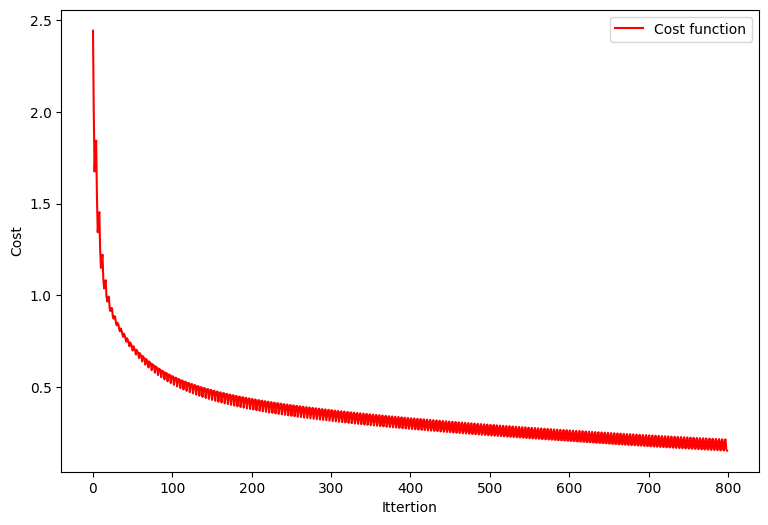

In [18]:
Neural_Network = mini_batch_GD_Neural_Networks(layers=[x_train.shape[0],16,8,3], batch_size=30, learning_rate=0.05)
A, cost = Neural_Network.train_mini_batch_GD(x_train, y_train)
plot_1D(cost)

قسمت د

In [19]:
class Batch_Neural_Networks:
    def __init__(self,X,Y,layers=[5,6,3], learning_rate = 1e-3, epoch=300,seed=1):
        self.layers = layers
        self.samples = X.shape[1]
        self.learning_rate = learning_rate
        self.cost = []
        self.accuracy = []
        #Forward propagation
        self.W, self.Bias,self.Z,self.A = \
            allocating_hyperparameters(self.layers,self.samples,random=True,seed=seed)

        #Backward propagation
        self.dW, self.dBias,self.dZ,self.dA = \
            allocating_hyperparameters(self.layers,self.samples,random=False,seed=seed)
        
        #Setting Input as the layer-zero
        self.Y = Y
        self.A[0] = X

    def Forward_Propagation(self):
        for index in range(1,len(self.layers)):
            self.Z[index] = np.dot(self.W[index], self.A[index-1]) + self.Bias[index]

            if index == len(self.layers) - 1:
                self.A[index] = softmax_function(self.Z[index])

            else:
                self.A[index] = sigmoid(self.Z[index])

        return self.Z, self.A
    
    def Backward_Propagation(self):

        for layer in range(len(self.layers)-1, 0, -1):
            
            if layer == len(self.layers)-1:
                self.dZ[layer] = self.A[layer] - self.Y.T
            else : 
                self.dZ[layer] = np.dot((self.W[layer+1]).T,self.dZ[layer+1]) * (sigmoid(self.Z[layer]) * (1-sigmoid(self.Z[layer])))
            
            self.dW[layer] = np.dot(self.dZ[layer], (self.A[layer-1]).T)
            self.dBias[layer] = self.dZ[layer]

            self.dW[layer] = self.dW[layer] / self.samples
            self.dBias[layer] = self.dBias[layer] / self.samples

            self.W[layer] = self.W[layer] - (self.learning_rate * self.dW[layer])
            self.Bias[layer] = self.Bias[layer] - (self.learning_rate * self.dBias[layer])

    def Accuracy(self, y_hat):
        
        y_hat = np.argmax(y_hat,axis=0)
        y_hat = one_hot_encode(y_hat)
        if y_hat.shape != self.Y.shape:
            return None
        return np.sum(y_hat * self.Y) / self.Y.shape[0]

    def train_GD(self, X, lr=1e-5, Epoch=800):
        for epoch in range(Epoch):
            self.Z, self.A = self.Forward_Propagation()
            self.Backward_Propagation()
            tmpCost = cost_estimation(self.A[-1], (self.Y).T)
            self.cost.append(tmpCost)

            tmpacc = self.Accuracy(self.A[-1])
            if tmpacc:
                self.accuracy.append(tmpacc)
            
            params = {'derevitives': 
                  {
                    'dW':self.dW,
                    'dBias':self.dBias,
                    'dA':self.dA,
                    'dZ':self.dZ
                  },
                  
                'hyperparameters':
                {
                    'W':self.dW,
                    'Bias':self.dBias,
                    'A':self.dA,
                    'Z':self.dZ
                }
        }
        return params,self.cost, self.accuracy
    
    def test(self, x_test, y_test):
        _, self.Bias, self.Z, self.A = \
            allocating_hyperparameters(self.layers,x_test.shape[1],random=True)
        self.A[0] = x_test
        self.Y = y_test

        self.Z, self.A = self.Forward_Propagation() 
        acc = self.Accuracy(self.A[-1])
        return acc

قسمت د

نمودار خطا در قسمت Batch بر حسب تعداد ایپاک رسم شده است.

ساختار شبکه شامل لایه ورودی، لایه خروجی و یک لایه مخفی با 8 نورون است

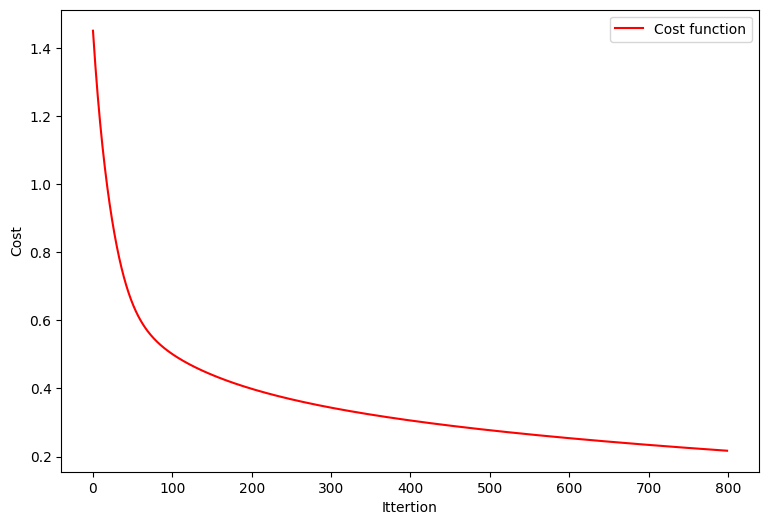

In [20]:
Neural_Network = Batch_Neural_Networks(x_train,y_train,layers=[x_train.shape[0],8,3],learning_rate=0.05)
params, cost, _ = Neural_Network.train_GD(x_train)
plot_1D(cost)


The layers contain input_layer, hidden_layers, and output_layer respectively.

قسمت ه

نمودار خطا و دقت بر روی داده های آموزشی

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


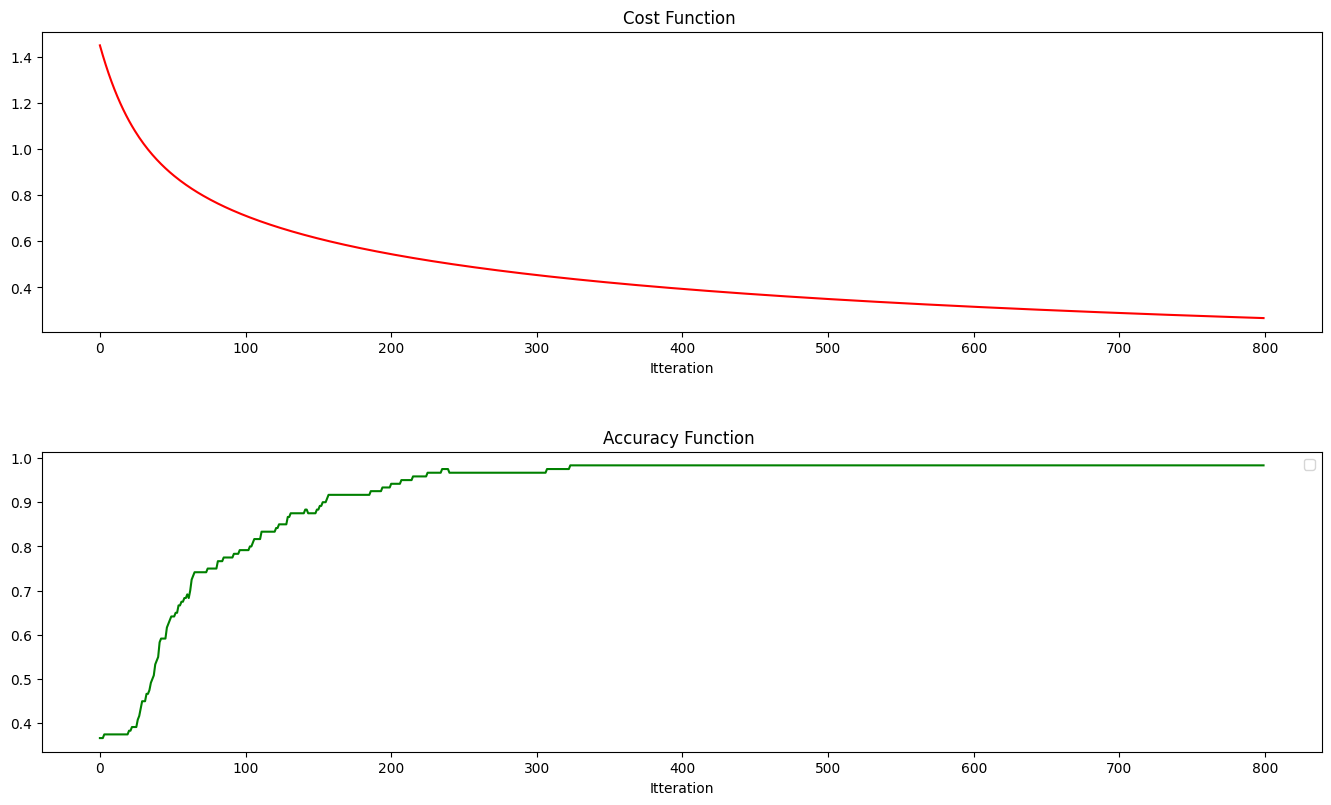

In [21]:
Neural_Network = Batch_Neural_Networks(x_train,y_train,layers=[x_train.shape[0],4,3],learning_rate=0.05)
A, cost, acc = Neural_Network.train_GD(x_train)
plot_2D(cost,acc)


In [22]:
acc = Neural_Network.test(x_test, y_test)
print(f'Accuracy on the test set is : {acc*100}%')

Accuracy on the test set is : 93.33333333333333%


قسمت و

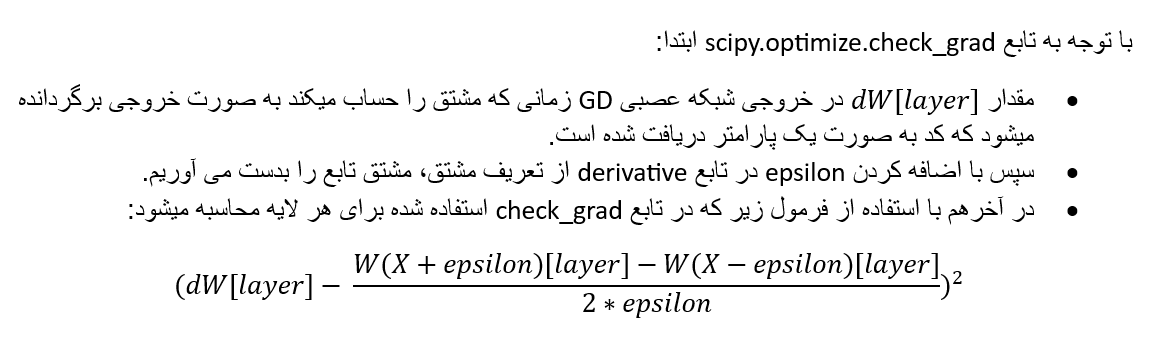

In [23]:
from IPython import display
display.Image("report.PNG")

In [24]:
def derivative(NeuralNetwork, layers, epsilon=1e-5 ):
    Neural_Network_minus = NeuralNetwork(x_train - epsilon ,y_train,layers=layers,learning_rate=0.05)
    params_minus, _1 , _2 = Neural_Network_minus.train_GD(x_train - epsilon)

    Neural_Network_plus = NeuralNetwork(x_train + epsilon ,y_train,layers=layers,learning_rate=0.05)
    params_plus, _1 , _2 = Neural_Network_plus.train_GD(x_train + epsilon)

    return params_minus, params_plus


In [25]:
def check_grad(NeuralNetwork, grad, layers, hyper_paramer='W', epsilon=1e-5):

    params_minus, params_plus = derivative(NeuralNetwork, layers, epsilon=1e-5 )

    result = []
    for layer in range(1,len(layers)):
        function_gradient = (params_plus['hyperparameters'][hyper_paramer][layer]\
        - params_minus['hyperparameters'][hyper_paramer][layer]) / (2*epsilon)

        result.append(np.sqrt(np.sum((grad[layer] - function_gradient)**2)))
    
    return result

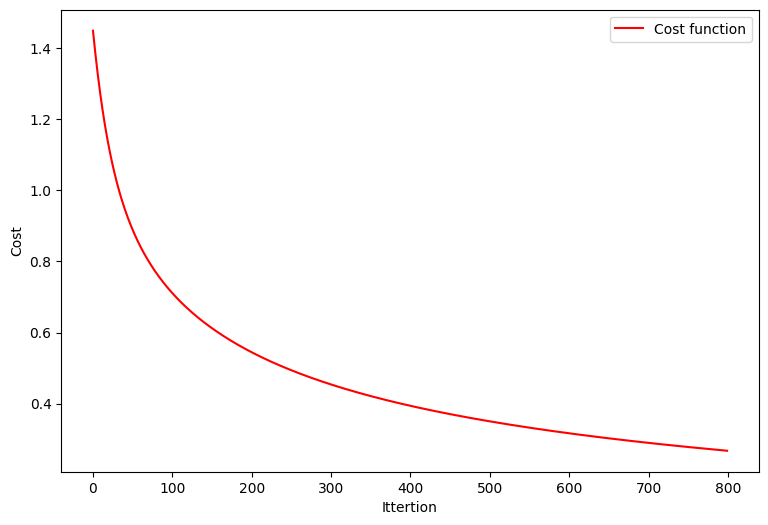

In [26]:
layers = [x_train.shape[0], 4, y_train.shape[1]]
Neural_Network = Batch_Neural_Networks(x_train,y_train,layers=layers,learning_rate=0.05)
params, cost, _ = Neural_Network.train_GD(x_train)
plot_1D(cost)

In [27]:
check_grad(Batch_Neural_Networks, params['derevitives']['dW'], layers, epsilon=1e-5)

[0.05691536481991374, 0.06280872136602669]

قسمت ز

با استفاده ساخت یک ارایه 3 عضوی رندم تمام پارامتر ها را با آن مقدار seed مقدار دهی میکنیم و نقاط شروع متفاوتی ایجاد میشود

In [28]:
seed = np.random.randint(1,100,3)
seed

array([38, 13, 73])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy on the test data is : 60.0%


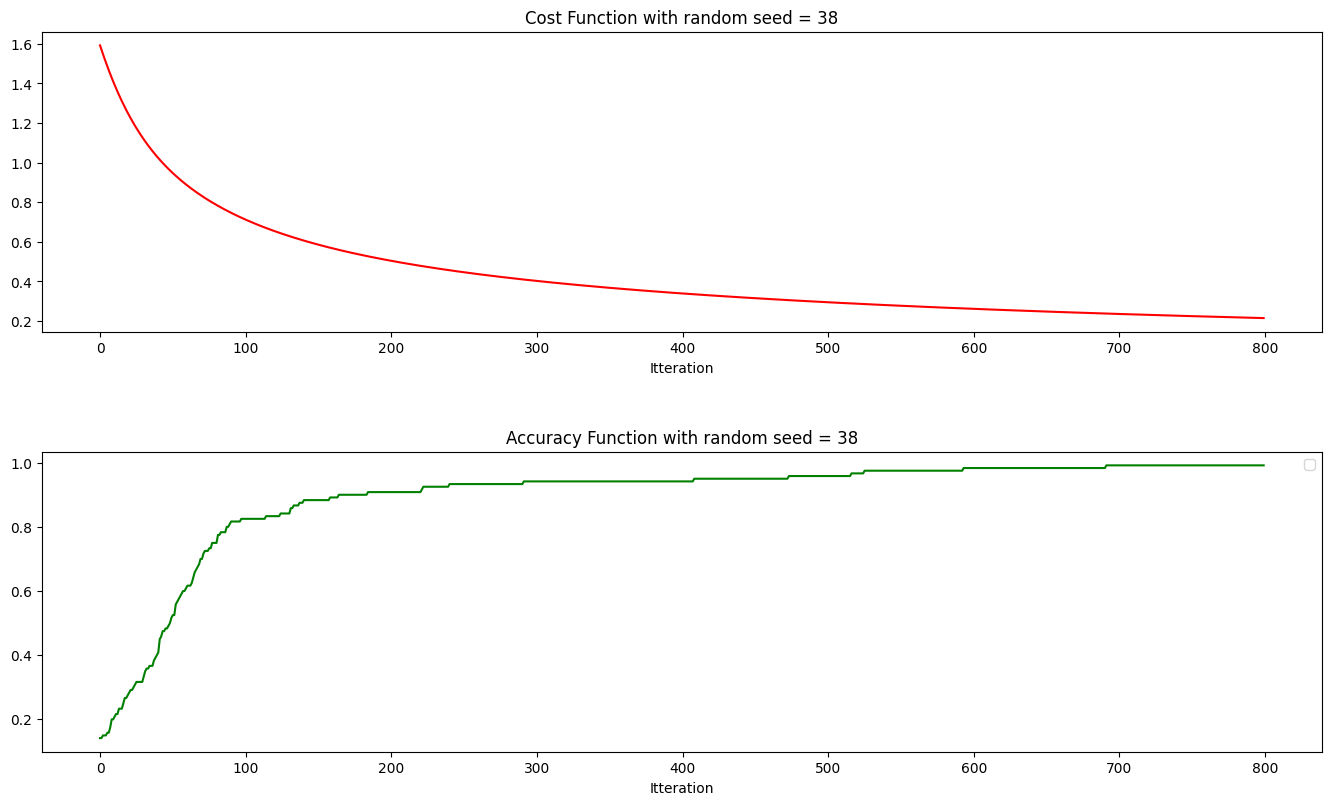

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy on the test data is : 56.666666666666664%


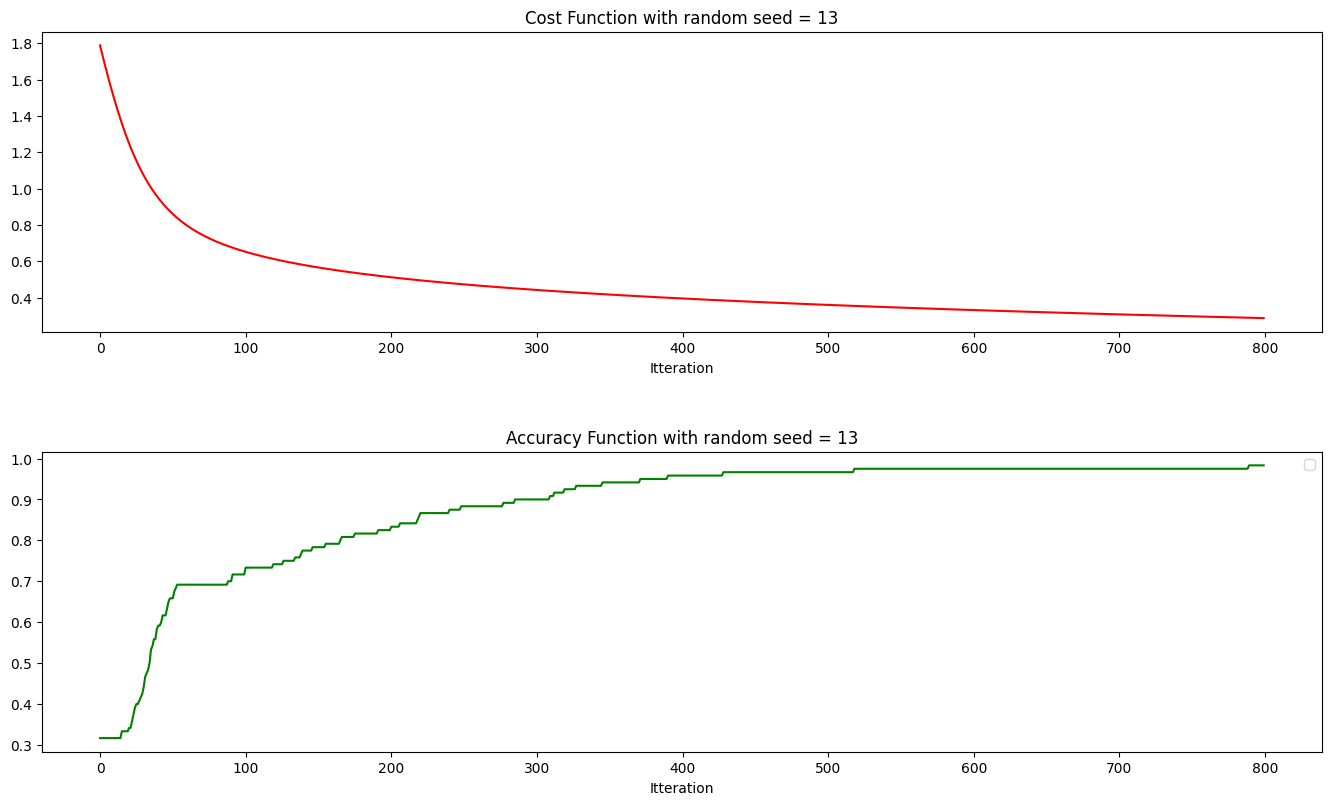

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy on the test data is : 50.0%


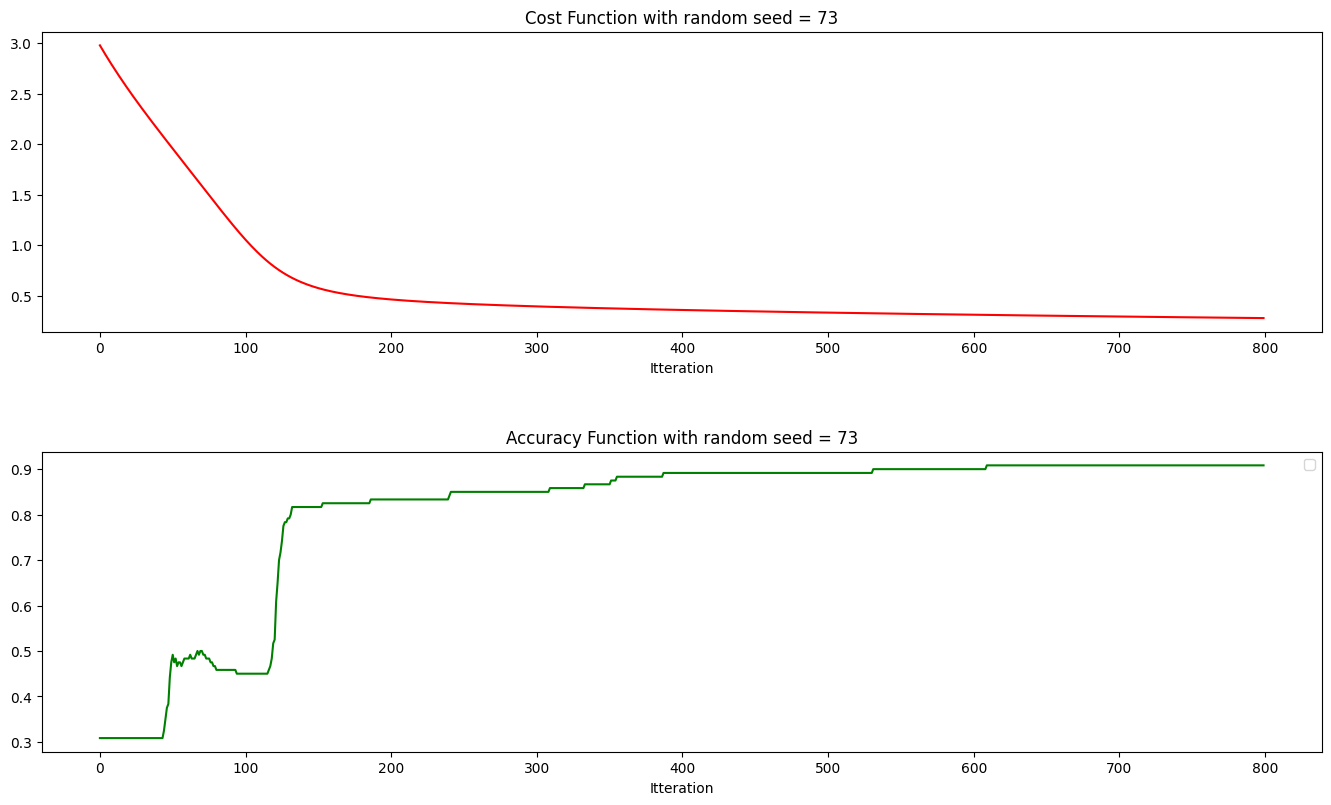

In [29]:
for random in seed:
    random_Neural_Network = Batch_Neural_Networks(x_train,y_train,layers=[x_train.shape[0],4,3]
                                           ,learning_rate=0.05,seed=random)
    A, cost, acc = random_Neural_Network.train_GD(x_train)
    acc_test = random_Neural_Network.test(x_test, y_test)
    print(f'Accuracy on the test data is : {acc_test*100}%')
    plot_2D(cost,acc,title = f'with random seed = {random}')